# 확률적 경사 하강법
#### 핵심 키워드: 확률적 경사 하강법, 손실 함수, 에포크

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\sanghui\miniconda3\envs\hongong\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


* 확률적 경사하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

In [9]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [10]:
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

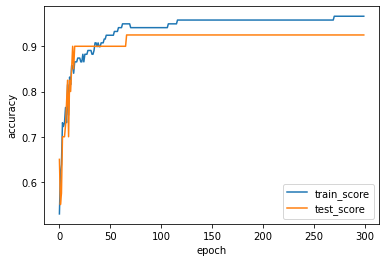

In [13]:
from cProfile import label
import matplotlib.pyplot as plt
plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [14]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [15]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


* 힌지 손실(hinge loss), 서포트 벡터 머신(support vector machine)

In [16]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


* **확률적 경사 하강법**은 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사 하강법이 된다. 한번에 전체 샘플을 사용하면 배치 경사 하강법이 된다.
* **손실 함수**는 확률적 경사 하강법이 최적화할 대상이다. 대부분의 문제에 잘 맞는 손실 함수가 이미 정의되어 있다. 이진 분류에는 로지스틱 회귀(또는 이진 크로스엔트로피) 손실 함수를 사용한다. 다중 분류에는 크로스엔트로피 손실 함수를 사용한다. 회귀 문제에는 평균 제곱 오차 손실 함수를 사용한다.
* **에포크**는 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미한다. 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복한다.